# K近傍法（分類）

In [1]:
include("nonparametric_methods.jl")
using .nonparametric_methods

## 問題：2クラス分類

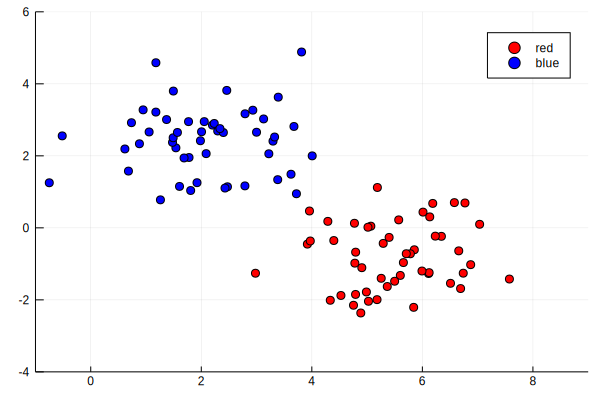

In [2]:
using Plots
using Random

Random.seed!(3)

N = 50
red = randn(N, 2) .+ [5.5 -1.0]
blue = randn(N, 2) .+ [2.0 2.5]

X = vcat(red, blue)
t = vcat(ones(N), zeros(N))

xline = collect(range(-1, 9, length=10000))

scatter(red[:, 1], red[:, 2], label="red", color="red")
scatter!(blue[:, 1], blue[:, 2], label="blue", color="blue")
xlims!(-1, 9)
ylims!(-4, 6)

In [3]:
k = 3

model = KNearestNeiboursClassification( k )
fit( model, X, t );

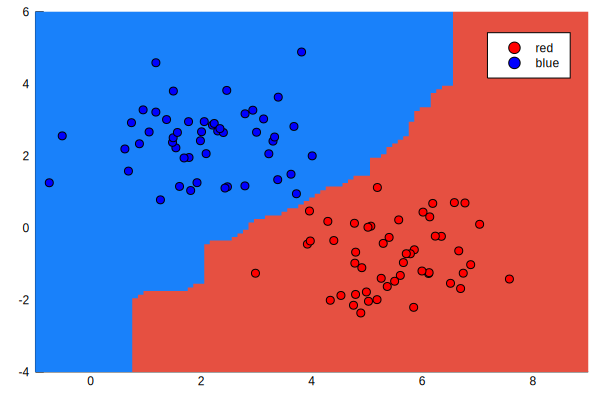

In [4]:
x1line = collect(-1.0:0.1:9.0)
x2line = collect(-4.0:0.1:6.0)
xgrid = zeros( size(x1line, 1) * size(x2line, 1), 2 )
ij = 1
for i=1:size(x1line, 1)
    for j=1:size(x2line, 1)
        xgrid[ij, 1] = x1line[i]
        xgrid[ij, 2] = x2line[j]
        ij += 1
    end
end

y = predict( model, xgrid )
heatmap(x1line, x2line, reshape(y, size(x2line, 1), size(x1line, 1)), colorbar_entry=false, fillcolor=:bkr)
scatter!(red[:, 1], red[:, 2], label="red", color="red")
scatter!(blue[:, 1], blue[:, 2], label="blue", color="blue")
xlims!(-1, 9)
ylims!(-4, 6)